<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modules" data-toc-modified-id="Modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modules</a></span><ul class="toc-item"><li><span><a href="#Restrict-notebooks" data-toc-modified-id="Restrict-notebooks-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Restrict notebooks</a></span></li></ul></li><li><span><a href="#Notebooks-with-modules" data-toc-modified-id="Notebooks-with-modules-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebooks with modules</a></span></li><li><span><a href="#Local-vs-External" data-toc-modified-id="Local-vs-External-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Local vs External</a></span><ul class="toc-item"><li><span><a href="#By-notebook" data-toc-modified-id="By-notebook-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>By notebook</a></span><ul class="toc-item"><li><span><a href="#Local" data-toc-modified-id="Local-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Local</a></span></li><li><span><a href="#External" data-toc-modified-id="External-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>External</a></span></li><li><span><a href="#Venn" data-toc-modified-id="Venn-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Venn</a></span></li></ul></li></ul></li><li><span><a href="#Import-Type" data-toc-modified-id="Import-Type-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Import Type</a></span><ul class="toc-item"><li><span><a href="#Local" data-toc-modified-id="Local-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Local</a></span></li><li><span><a href="#External" data-toc-modified-id="External-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>External</a></span></li></ul></li><li><span><a href="#Which-modules" data-toc-modified-id="Which-modules-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Which modules</a></span><ul class="toc-item"><li><span><a href="#General" data-toc-modified-id="General-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>General</a></span><ul class="toc-item"><li><span><a href="#Full-import" data-toc-modified-id="Full-import-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Full import</a></span></li><li><span><a href="#Toplevel" data-toc-modified-id="Toplevel-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Toplevel</a></span><ul class="toc-item"><li><span><a href="#Percentage" data-toc-modified-id="Percentage-5.1.2.1"><span class="toc-item-num">5.1.2.1&nbsp;&nbsp;</span>Percentage</a></span></li></ul></li></ul></li><li><span><a href="#import" data-toc-modified-id="import-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>import</a></span><ul class="toc-item"><li><span><a href="#Full-import" data-toc-modified-id="Full-import-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Full import</a></span></li><li><span><a href="#Toplevel" data-toc-modified-id="Toplevel-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Toplevel</a></span></li></ul></li><li><span><a href="#import_from" data-toc-modified-id="import_from-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>import_from</a></span><ul class="toc-item"><li><span><a href="#Full-import" data-toc-modified-id="Full-import-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Full import</a></span></li><li><span><a href="#Toplevel" data-toc-modified-id="Toplevel-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Toplevel</a></span></li></ul></li><li><span><a href="#load_ext" data-toc-modified-id="load_ext-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>load_ext</a></span><ul class="toc-item"><li><span><a href="#Full-import" data-toc-modified-id="Full-import-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Full import</a></span></li><li><span><a href="#Toplevel" data-toc-modified-id="Toplevel-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Toplevel</a></span></li></ul></li></ul></li><li><span><a href="#Test-related-modules" data-toc-modified-id="Test-related-modules-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test-related modules</a></span></li></ul></div>

# Modules

Analyze modules: local and external modules, import type, test modules.

In [1]:
import sys

sys.path.insert(0, "../archaeology")
sys.path.insert(0, "../analysis")
from collections import Counter

import numpy as np
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

from db import connect
from analysis_helpers import (calculate_auto, close_fig, display_counts,
                              getitem, relative_var, savefig)

%matplotlib inline

In [2]:
with connect() as session:
    # print('Last query:', session.query(Query).all()[-1])
    raw_modules = pd.read_sql_table("notebook_modules", session.connection())
    print("Modules:", len(raw_modules))

Modules: 20690


In [3]:
columns = [
    "any_any",
    "local_any",
    "external_any",
    "any_import_from",
    "local_import_from",
    "external_import_from",
    "any_import",
    "local_import",
    "external_import",
    "any_load_ext",
    "local_load_ext",
    "external_load_ext",
]
count_columns = [c + "_count" for c in columns]
for column in columns:
    raw_modules[column] = raw_modules[column].apply(
        lambda c: {a for a in c.split(",") if a}
    )
    raw_modules["toplevel_" + column] = raw_modules[column].apply(
        lambda imports: {getitem(x.split("."), 0, x) for x in imports}
    )
    raw_modules["toplevel_" + column + "_count"] = raw_modules[
        "toplevel_" + column
    ].apply(len)

raw_modules.head(5)

,id,repository_id,notebook_id,index,index_count,any_any,any_any_count,local_any,local_any_count,external_any,...,toplevel_local_import,toplevel_local_import_count,toplevel_external_import,toplevel_external_import_count,toplevel_any_load_ext,toplevel_any_load_ext_count,toplevel_local_load_ext,toplevel_local_load_ext_count,toplevel_external_load_ext,toplevel_external_load_ext_count
0,1,6,2,1,1,"{pensa, os}",2,{},0,"{pensa, os}",...,{},0,{os},1,{},0,{},0,{},0
1,2,8,3,"4,6",2,"{seaborn, pcntoolkit.normative, pickle, matplo...",9,{nm_utils},1,"{seaborn, pcntoolkit.normative, pickle, matplo...",...,{},0,"{seaborn, pickle, pandas, numpy, os}",5,{},0,{},0,{},0
2,3,8,4,4,1,"{seaborn, pcntoolkit.normative, pickle, matplo...",9,{nm_utils},1,"{seaborn, pcntoolkit.normative, pickle, matplo...",...,{},0,"{seaborn, pickle, pandas, numpy, os}",5,{},0,{},0,{},0
3,4,8,5,"4,6",2,"{seaborn, pcntoolkit.normative, pickle, matplo...",9,{nm_utils},1,"{seaborn, pcntoolkit.normative, pickle, matplo...",...,{},0,"{seaborn, pickle, pandas, numpy, os}",5,{},0,{},0,{},0
4,5,8,6,4,1,"{seaborn, pcntoolkit.normative, pickle, matplo...",9,{nm_utils},1,"{seaborn, pcntoolkit.normative, pickle, matplo...",...,{},0,"{seaborn, pickle, pandas, numpy, os}",5,{},0,{},0,{},0


## Restrict notebooks

In [4]:
SKIP_MAP = {
    "f_": 1024 + 512,
    "d_": 1024 + 512 + 128,
    "dt_": 1024 + 512 + 128 + 32,
    "dr_": 1024 + 512 + 128 + 64,
}

CONFIG = {
    "Default": "f_",
    "Remove duplicates": "d_",
    "Remove duplicates and toy": "dt_",
    "Remove duplicates and restricted toy": "dr_",
}

In [5]:
@calculate_auto(CONFIG, save_to="modules", level=None)
def func(prefix=""):
    return raw_modules[
        np.bitwise_and(raw_modules["skip"], SKIP_MAP[prefix]) == 0
    ].copy()

In [6]:
@calculate_auto(CONFIG, save_to="total_valid_python_notebooks", result=None)
def fn(prefix):
    with connect() as session:
        query = (
            "SELECT count(id) "
            "FROM notebooks "
            "WHERE NOT (kernel = 'no-kernel' AND nbformat = '0') "
            "AND language = 'python' "
            "AND language_version != 'unknown' "
            "AND total_cells != 0 "
            "AND processed & 16 = 0 "
            "AND skip & {} = 0"
        ).format(SKIP_MAP[prefix])
        result = session.execute(query)
        total_valid_python_notebooks = result.scalar()

        print("Valid Python Notebooks: {}".format(total_valid_python_notebooks))
    return total_valid_python_notebooks

### Default

Valid Python Notebooks: 20699


### Remove duplicates

Valid Python Notebooks: 20699


### Remove duplicates and toy

Valid Python Notebooks: 20699


### Remove duplicates and restricted toy

Valid Python Notebooks: 20699


# Notebooks with modules

In [7]:
@calculate_auto(CONFIG)
def fn(modules, total_valid_python_notebooks, prefix):
    total_notebooks_with_modules = len(modules[modules["any_any_count"] > 0])
    return relative_var(
        prefix + "notebooks_with_modules",
        total_notebooks_with_modules,
        total_valid_python_notebooks,
    )

### Default

20,046 (96.85%)


### Remove duplicates

20,046 (96.85%)


### Remove duplicates and toy

20,046 (96.85%)


### Remove duplicates and restricted toy

20,046 (96.85%)


# Local vs External

In [8]:
@calculate_auto(CONFIG, save_to="local", result=None)
def fn(modules, prefix):
    local = modules["local_any_count"].sum()
    print("Local:", local)
    return local


@calculate_auto(CONFIG, save_to="external", result=None)
def fn(modules, prefix):
    external = modules["external_any_count"].sum()
    print("External:", external)
    return external

### Default

Local: 3324


### Remove duplicates

Local: 3324


### Remove duplicates and toy

Local: 3324


### Remove duplicates and restricted toy

Local: 3324


### Default

External: 165117


### Remove duplicates

External: 165117


### Remove duplicates and toy

External: 165117


### Remove duplicates and restricted toy

External: 165117


## By notebook

### Local

In [9]:
@calculate_auto(CONFIG, save_to="local_notebook", result=None)
def fn(modules, total_valid_python_notebooks, prefix):
    local_notebook = modules[modules["local_any_count"] > 0]
    print(
        relative_var(
            prefix + "notebooks_with_local_modules",
            len(local_notebook),
            total_valid_python_notebooks,
        )
    )
    return local_notebook

### Default

2,174 (10.50%)


### Remove duplicates

2,174 (10.50%)


### Remove duplicates and toy

2,174 (10.50%)


### Remove duplicates and restricted toy

2,174 (10.50%)


### External

In [10]:
@calculate_auto(CONFIG, save_to="external_notebook", result=None)
def fn(modules, total_valid_python_notebooks, prefix):
    external_notebook = modules[modules["external_any_count"] > 0]
    print(
        relative_var(
            prefix + "notebooks_with_external_modules",
            len(external_notebook),
            total_valid_python_notebooks,
        )
    )
    return external_notebook

### Default

19,944 (96.35%)


### Remove duplicates

19,944 (96.35%)


### Remove duplicates and toy

19,944 (96.35%)


### Remove duplicates and restricted toy

19,944 (96.35%)


### Venn

### Default

2072


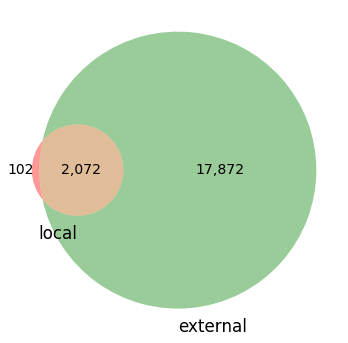

### Remove duplicates

2072


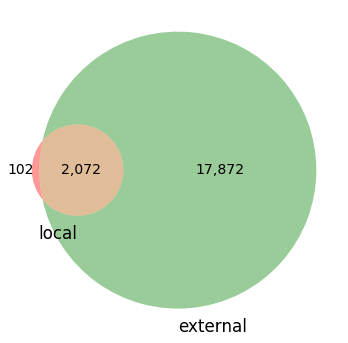

### Remove duplicates and toy

2072


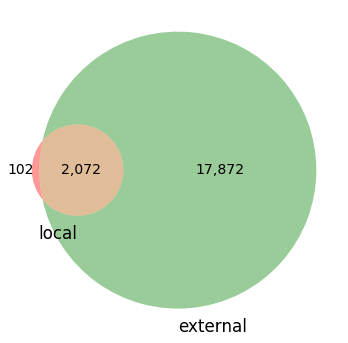

### Remove duplicates and restricted toy

2072


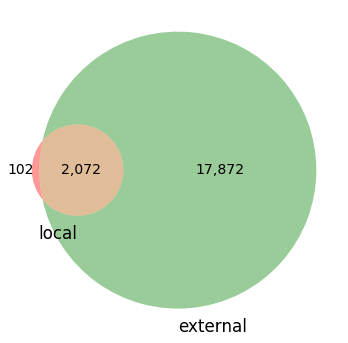

In [11]:
@calculate_auto(CONFIG)
@close_fig
def fn(local_notebook, external_notebook, prefix):
    local_ids = set(local_notebook.index.tolist())
    external_ids = set(external_notebook.index.tolist())
    print(len(local_ids & external_ids))
    with savefig(prefix + "notebook_module_external_local", 8, 6):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        venn = venn2(
            subsets=(local_ids, external_ids), set_labels=("local", "external"), ax=ax
        )
        for label in venn.subset_labels:
            label.set_text("{0:,g}".format(int(label.get_text())))
        local_label = venn.subset_labels[0]
        xy = local_label.get_position()
        xy = (xy[0] - 0.06, xy[1])
        local_label.set_position(xy)

# Import Type

* import: `import numpy`
* import_from: `from sklearn import datasets`
* load_ext: `%load_ext autoreload`


### Default

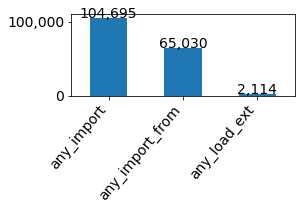

,0
any_import,104695
any_import_from,65030
any_load_ext,2114


<Figure size 432x288 with 0 Axes>

### Remove duplicates

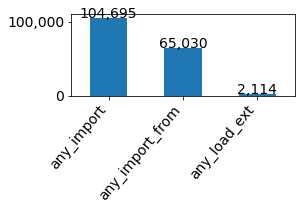

,0
any_import,104695
any_import_from,65030
any_load_ext,2114


<Figure size 432x288 with 0 Axes>

### Remove duplicates and toy

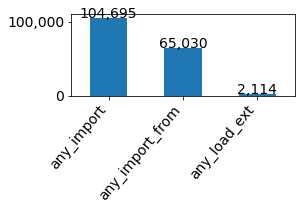

,0
any_import,104695
any_import_from,65030
any_load_ext,2114


<Figure size 432x288 with 0 Axes>

### Remove duplicates and restricted toy

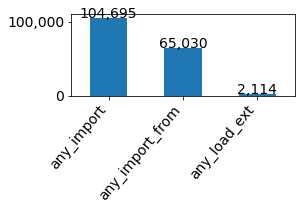

,0
any_import,104695
any_import_from,65030
any_load_ext,2114


<Figure size 432x288 with 0 Axes>

In [12]:
@calculate_auto(CONFIG)
@close_fig
def fn(modules, prefix):
    count = (
        modules[["any_import_count", "any_import_from_count", "any_load_ext_count"]]
        .sum()
        .rename(lambda x: x[:-6])
        .sort_values(ascending=False)
    )

    fig, counts = display_counts(
        count, width=4, show_values=True, template="{0:,}", plot=False, logy=False
    )
    ax = plt.gca()
    ax.legend().set_visible(False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
    plt.show()
    display(counts)

## Local

### Default

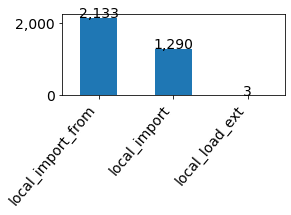

,0
local_import_from,2133
local_import,1290
local_load_ext,3


<Figure size 432x288 with 0 Axes>

### Remove duplicates

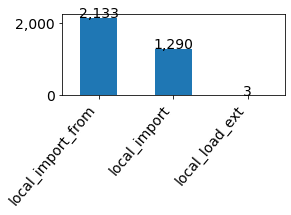

,0
local_import_from,2133
local_import,1290
local_load_ext,3


<Figure size 432x288 with 0 Axes>

### Remove duplicates and toy

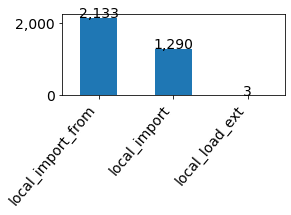

,0
local_import_from,2133
local_import,1290
local_load_ext,3


<Figure size 432x288 with 0 Axes>

### Remove duplicates and restricted toy

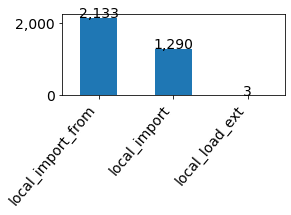

,0
local_import_from,2133
local_import,1290
local_load_ext,3


<Figure size 432x288 with 0 Axes>

In [13]:
@calculate_auto(CONFIG)
@close_fig
def fn(modules, prefix):
    count = (
        modules[
            ["local_import_count", "local_import_from_count", "local_load_ext_count"]
        ]
        .sum()
        .rename(lambda x: x[:-6])
        .sort_values(ascending=False)
    )

    fig, counts = display_counts(
        count, width=4, show_values=True, template="{0:,}", plot=False, logy=False
    )
    ax = plt.gca()
    ax.legend().set_visible(False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
    plt.show()
    display(counts)

## External

### Default

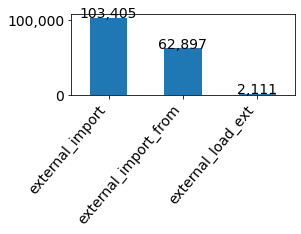

,0
external_import,103405
external_import_from,62897
external_load_ext,2111


<Figure size 432x288 with 0 Axes>

### Remove duplicates

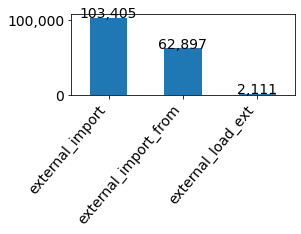

,0
external_import,103405
external_import_from,62897
external_load_ext,2111


<Figure size 432x288 with 0 Axes>

### Remove duplicates and toy

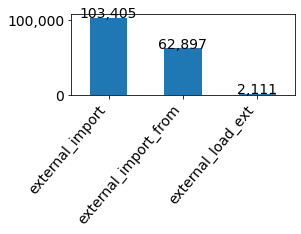

,0
external_import,103405
external_import_from,62897
external_load_ext,2111


<Figure size 432x288 with 0 Axes>

### Remove duplicates and restricted toy

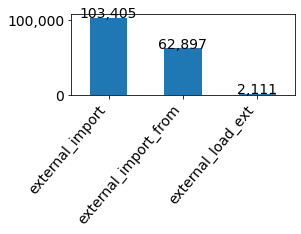

,0
external_import,103405
external_import_from,62897
external_load_ext,2111


<Figure size 432x288 with 0 Axes>

In [14]:
@calculate_auto(CONFIG)
@close_fig
def fn(modules, prefix):
    count = (
        modules[
            [
                "external_import_count",
                "external_import_from_count",
                "external_load_ext_count",
            ]
        ]
        .sum()
        .rename(lambda x: x[:-6])
        .sort_values(ascending=False)
    )

    fig, counts = display_counts(
        count, width=4, show_values=True, template="{0:,}", plot=False, logy=False
    )
    ax = plt.gca()
    ax.legend().set_visible(False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
    plt.show()
    display(counts)

# Which modules

## General

### Full import

### Default

,0
numpy,13521
pandas,11870
matplotlib.pyplot,10539
os,6908
seaborn,6073
matplotlib,3743
sys,3380
warnings,2194
scipy,2107
scipy.stats,2104


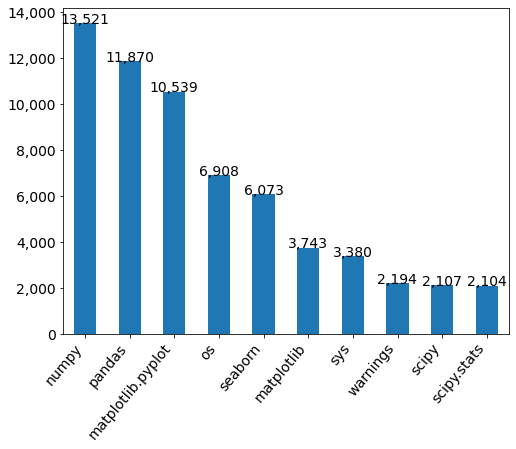

### Remove duplicates

,0
numpy,13521
pandas,11870
matplotlib.pyplot,10539
os,6908
seaborn,6073
matplotlib,3743
sys,3380
warnings,2194
scipy,2107
scipy.stats,2104


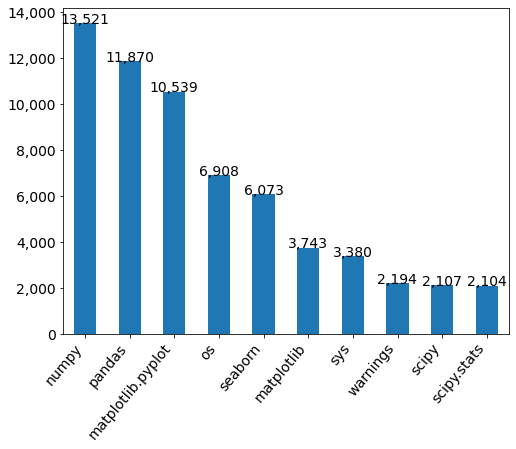

### Remove duplicates and toy

,0
numpy,13521
pandas,11870
matplotlib.pyplot,10539
os,6908
seaborn,6073
matplotlib,3743
sys,3380
warnings,2194
scipy,2107
scipy.stats,2104


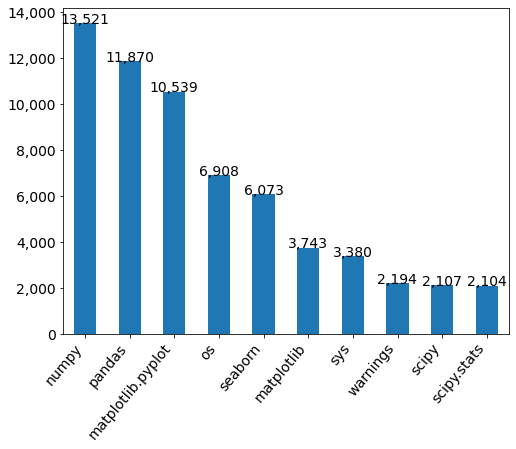

### Remove duplicates and restricted toy

,0
numpy,13521
pandas,11870
matplotlib.pyplot,10539
os,6908
seaborn,6073
matplotlib,3743
sys,3380
warnings,2194
scipy,2107
scipy.stats,2104


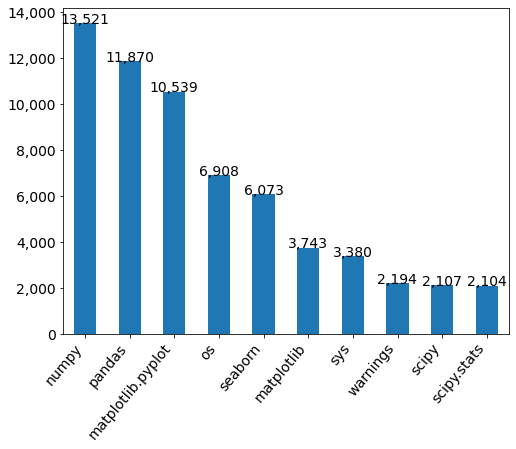

In [15]:
@calculate_auto(CONFIG)
@close_fig
def fn(modules, prefix):
    counter = Counter()
    modules["any_any"].agg(lambda x: counter.update(x))
    del counter[""]
    counts = pd.Series(counter).sort_values(ascending=False)
    with savefig(prefix + "notebook_module_full_import", 8, 6):
        fig, cnt = display_counts(
            counts,
            width=20,
            show_values=True,
            plot=False,
            cut=slice(None, 10),
            logy=False,
        )
        display(cnt)
        ax = plt.gca()
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
        ax.legend().set_visible(False)

### Toplevel

### Default

,0
numpy,13542
pandas,11875
matplotlib,11834
os,7132
seaborn,6098
scipy,4902
sys,3380
sklearn,3032
warnings,2194
pathlib,2088


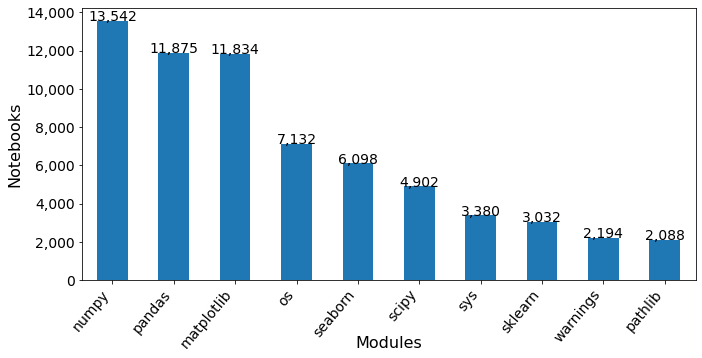

### Remove duplicates

,0
numpy,13542
pandas,11875
matplotlib,11834
os,7132
seaborn,6098
scipy,4902
sys,3380
sklearn,3032
warnings,2194
pathlib,2088


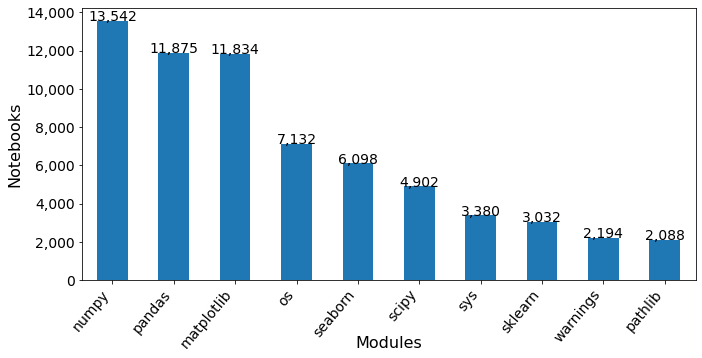

### Remove duplicates and toy

,0
numpy,13542
pandas,11875
matplotlib,11834
os,7132
seaborn,6098
scipy,4902
sys,3380
sklearn,3032
warnings,2194
pathlib,2088


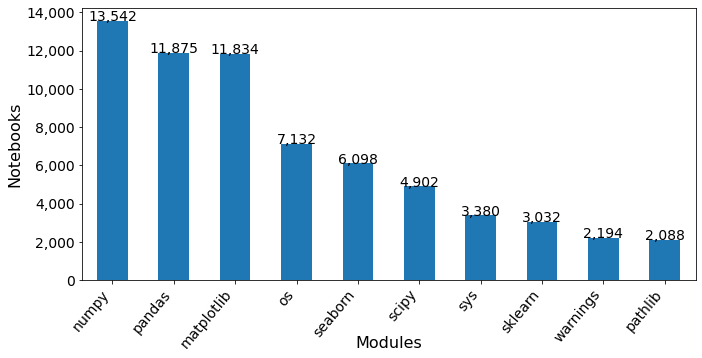

### Remove duplicates and restricted toy

,0
numpy,13542
pandas,11875
matplotlib,11834
os,7132
seaborn,6098
scipy,4902
sys,3380
sklearn,3032
warnings,2194
pathlib,2088


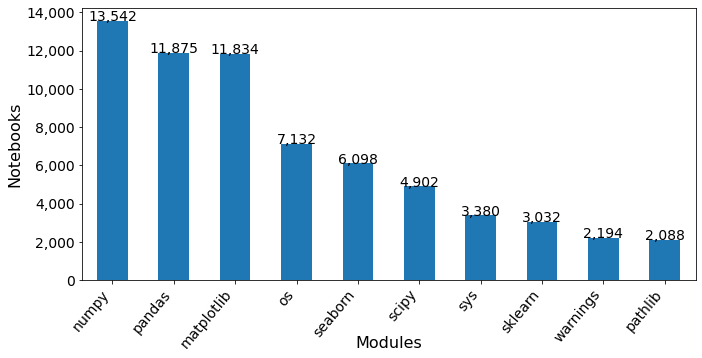

In [16]:
@calculate_auto(CONFIG, save_to="counts", result=None)
@close_fig
def fn(modules, prefix):
    counter = Counter()
    modules["toplevel_any_any"].agg(lambda x: counter.update(x))
    del counter[""]
    counts = pd.Series(counter).sort_values(ascending=False)
    with savefig(prefix + "notebook_module_toplevel", 11, 5):
        fig, cnt = display_counts(
            counts,
            width=20,
            show_values=True,
            plot=False,
            cut=slice(None, 10),
            logy=False,
        )
        display(cnt)
        ax = plt.gca()
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
        ax.legend().set_visible(False)
        ax.set_ylabel("Notebooks")
        ax.set_xlabel("Modules")
        ax.xaxis.labelpad = -15
        # ax.yaxis.labelpad = -15
    return counts

#### Percentage

### Default

,0
numpy,65.423450
pandas,57.369921
matplotlib,57.171844
os,34.455771
seaborn,29.460360
scipy,23.682303
sys,16.329291
sklearn,14.648051
warnings,10.599546
pathlib,10.087444


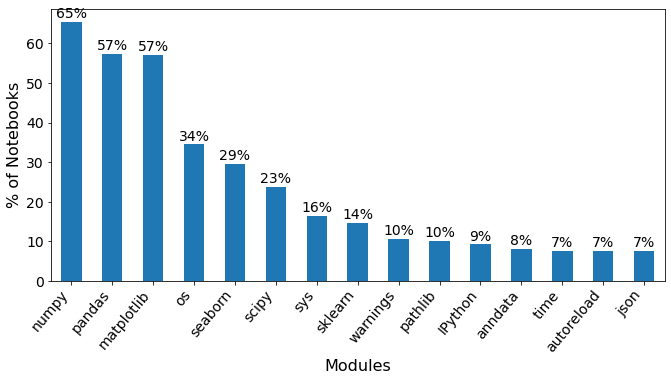

### Remove duplicates

,0
numpy,65.423450
pandas,57.369921
matplotlib,57.171844
os,34.455771
seaborn,29.460360
scipy,23.682303
sys,16.329291
sklearn,14.648051
warnings,10.599546
pathlib,10.087444


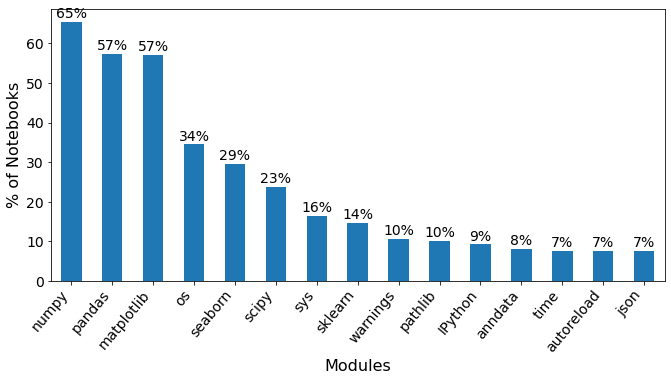

### Remove duplicates and toy

,0
numpy,65.423450
pandas,57.369921
matplotlib,57.171844
os,34.455771
seaborn,29.460360
scipy,23.682303
sys,16.329291
sklearn,14.648051
warnings,10.599546
pathlib,10.087444


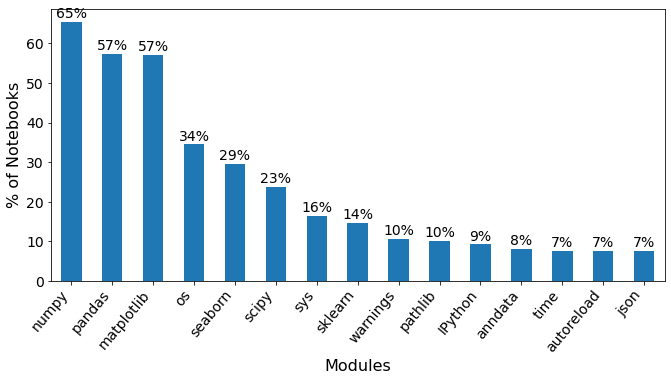

### Remove duplicates and restricted toy

,0
numpy,65.423450
pandas,57.369921
matplotlib,57.171844
os,34.455771
seaborn,29.460360
scipy,23.682303
sys,16.329291
sklearn,14.648051
warnings,10.599546
pathlib,10.087444


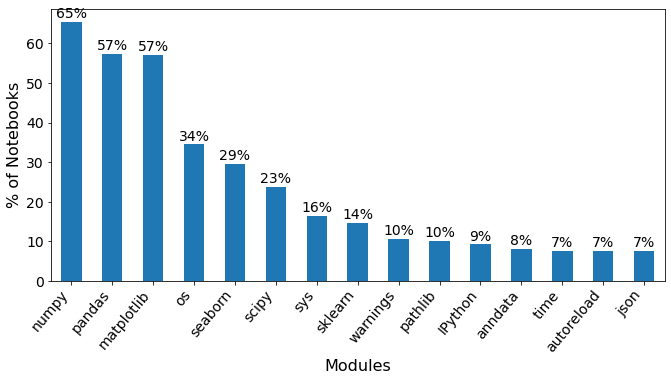

In [17]:
@calculate_auto(CONFIG)
@close_fig
def fn(counts, total_valid_python_notebooks, prefix):
    ncounts = counts / total_valid_python_notebooks * 100
    with savefig(prefix + "notebook_module_toplevel_percentage", 11, 5):
        fig, cnt = display_counts(
            ncounts,
            width=20,
            show_values=True,
            plot=False,
            cut=slice(None, 15),
            logy=False,
            template="{}%",
        )
        display(cnt)
        ax = plt.gca()
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
        ax.legend().set_visible(False)
        ax.set_ylabel("% of Notebooks")
        ax.set_xlabel("Modules")

## import

### Full import

### Default

,0
numpy,13463
pandas,11833
matplotlib.pyplot,10493
os,6652
seaborn,6025
sys,3358
matplotlib,2187
warnings,2151
anndata,1663
json,1550


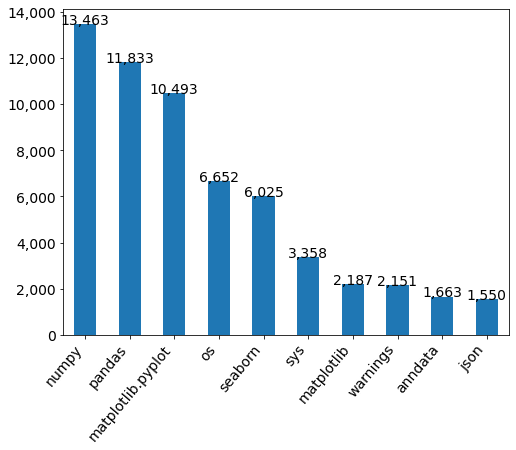

### Remove duplicates

,0
numpy,13463
pandas,11833
matplotlib.pyplot,10493
os,6652
seaborn,6025
sys,3358
matplotlib,2187
warnings,2151
anndata,1663
json,1550


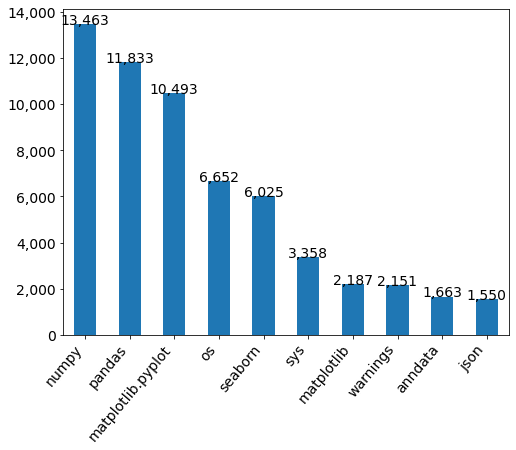

### Remove duplicates and toy

,0
numpy,13463
pandas,11833
matplotlib.pyplot,10493
os,6652
seaborn,6025
sys,3358
matplotlib,2187
warnings,2151
anndata,1663
json,1550


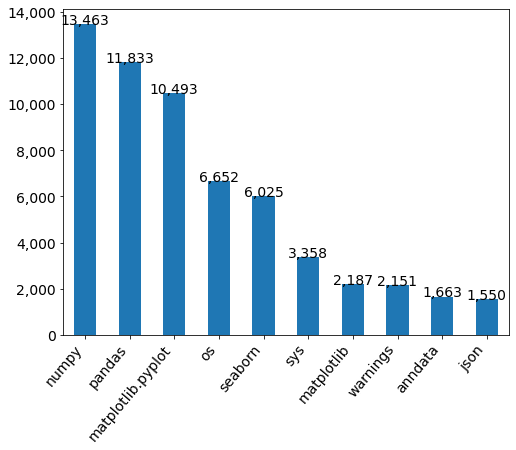

### Remove duplicates and restricted toy

,0
numpy,13463
pandas,11833
matplotlib.pyplot,10493
os,6652
seaborn,6025
sys,3358
matplotlib,2187
warnings,2151
anndata,1663
json,1550


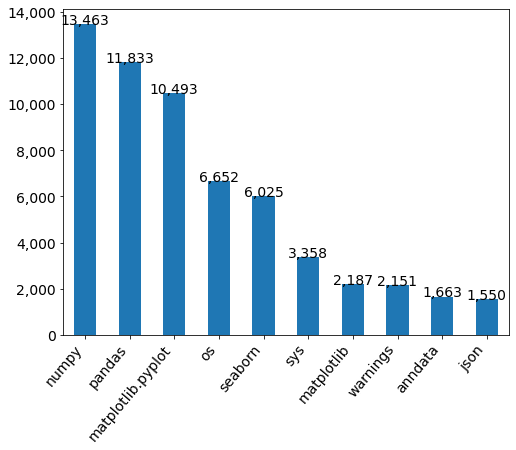

In [18]:
@calculate_auto(CONFIG)
@close_fig
def fn(modules, prefix):
    counter = Counter()
    modules["any_import"].agg(lambda x: counter.update(x))
    del counter[""]
    counts = pd.Series(counter).sort_values(ascending=False)
    with savefig(prefix + "notebook_module_import_full_import", 8, 6):
        fig, cnt = display_counts(
            counts,
            width=20,
            show_values=True,
            plot=False,
            cut=slice(None, 10),
            logy=False,
        )
        display(cnt)
        ax = plt.gca()
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
        ax.legend().set_visible(False)

### Toplevel

### Default

,0
numpy,13466
pandas,11833
matplotlib,11011
os,6784
seaborn,6083
sys,3358
scipy,2205
warnings,2151
anndata,1663
json,1550


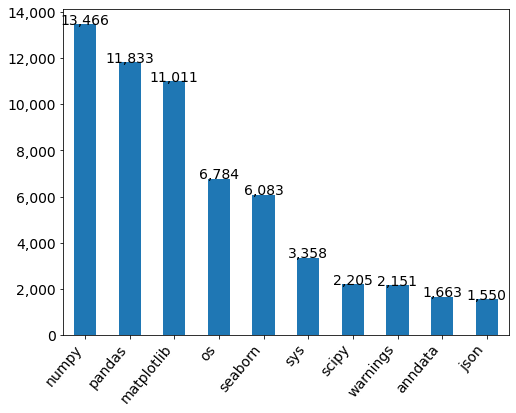

### Remove duplicates

,0
numpy,13466
pandas,11833
matplotlib,11011
os,6784
seaborn,6083
sys,3358
scipy,2205
warnings,2151
anndata,1663
json,1550


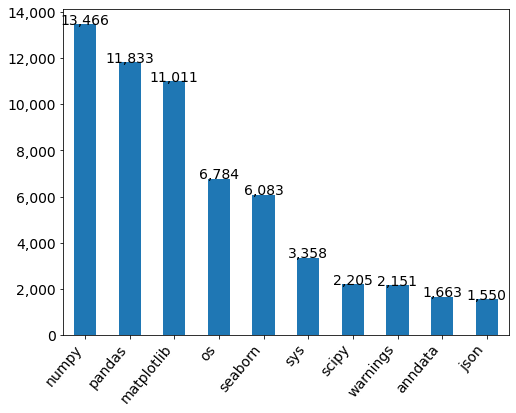

### Remove duplicates and toy

,0
numpy,13466
pandas,11833
matplotlib,11011
os,6784
seaborn,6083
sys,3358
scipy,2205
warnings,2151
anndata,1663
json,1550


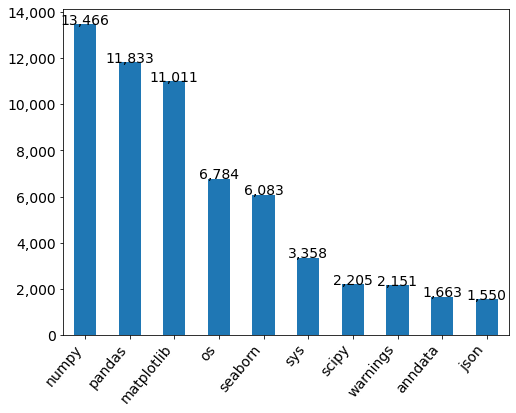

### Remove duplicates and restricted toy

,0
numpy,13466
pandas,11833
matplotlib,11011
os,6784
seaborn,6083
sys,3358
scipy,2205
warnings,2151
anndata,1663
json,1550


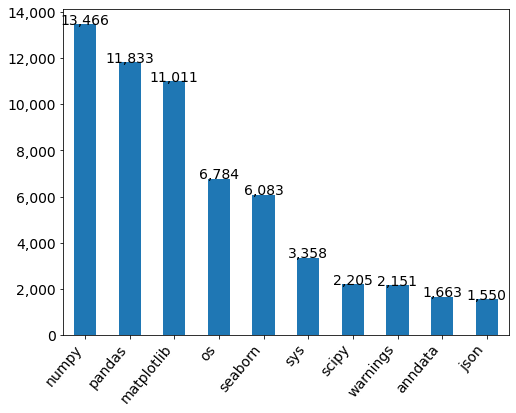

In [19]:
@calculate_auto(CONFIG)
@close_fig
def fn(modules, prefix):
    counter = Counter()
    modules["toplevel_any_import"].agg(lambda x: counter.update(x))
    del counter[""]
    counts = pd.Series(counter).sort_values(ascending=False)
    with savefig(prefix + "notebook_module_import_toplevel", 8, 6):
        fig, cnt = display_counts(
            counts,
            width=20,
            show_values=True,
            plot=False,
            cut=slice(None, 10),
            logy=False,
        )
        display(cnt)
        ax = plt.gca()
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
        ax.legend().set_visible(False)

## import_from

### Full import

### Default

,0
matplotlib,1981
IPython.display,1442
scipy,1387
scipy.stats,1158
sklearn.metrics,1116
collections,1103
sklearn.model_selection,1007
sklearn.preprocessing,836
pathlib,775
tqdm,749


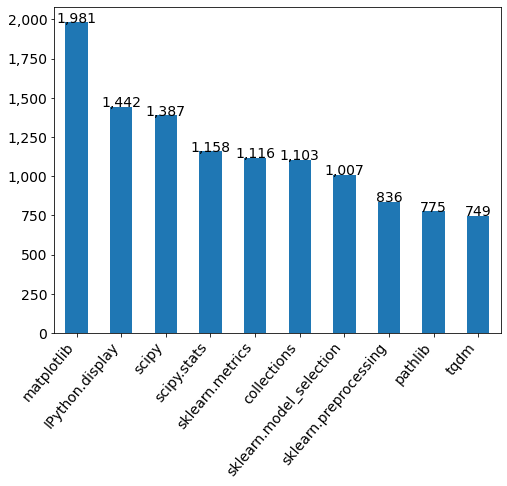

### Remove duplicates

,0
matplotlib,1981
IPython.display,1442
scipy,1387
scipy.stats,1158
sklearn.metrics,1116
collections,1103
sklearn.model_selection,1007
sklearn.preprocessing,836
pathlib,775
tqdm,749


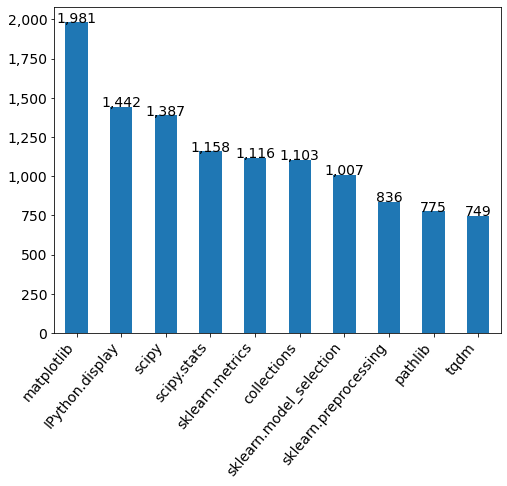

### Remove duplicates and toy

,0
matplotlib,1981
IPython.display,1442
scipy,1387
scipy.stats,1158
sklearn.metrics,1116
collections,1103
sklearn.model_selection,1007
sklearn.preprocessing,836
pathlib,775
tqdm,749


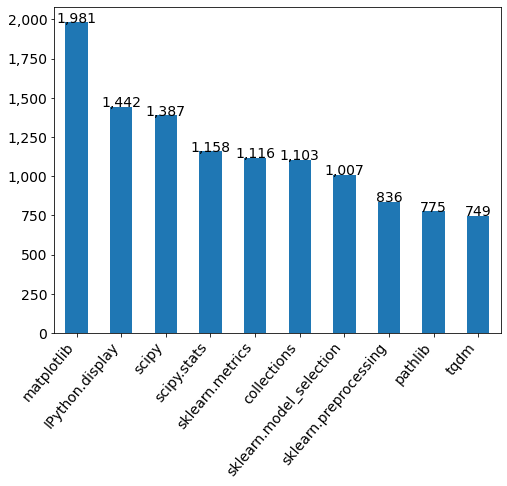

### Remove duplicates and restricted toy

,0
matplotlib,1981
IPython.display,1442
scipy,1387
scipy.stats,1158
sklearn.metrics,1116
collections,1103
sklearn.model_selection,1007
sklearn.preprocessing,836
pathlib,775
tqdm,749


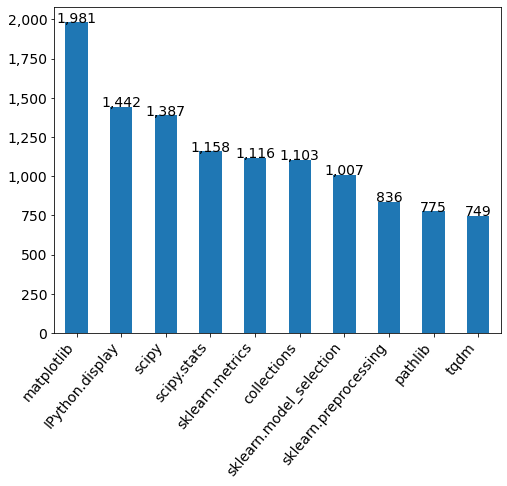

In [20]:
@calculate_auto(CONFIG)
@close_fig
def fn(modules, prefix):
    counter = Counter()
    modules["any_import_from"].agg(lambda x: counter.update(x))
    del counter[""]
    counts = pd.Series(counter).sort_values(ascending=False)
    with savefig(prefix + "notebook_module_import_from_full_import", 8, 6):
        fig, cnt = display_counts(
            counts,
            width=20,
            show_values=True,
            plot=False,
            cut=slice(None, 10),
            logy=False,
        )
        display(cnt)
        ax = plt.gca()
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
        ax.legend().set_visible(False)

### Toplevel

### Default

,0
scipy,3486
sklearn,2875
matplotlib,2755
IPython,1796
tqdm,1438
collections,1110
cemba_data,776
pathlib,775
ALLCools,690
statsmodels,690


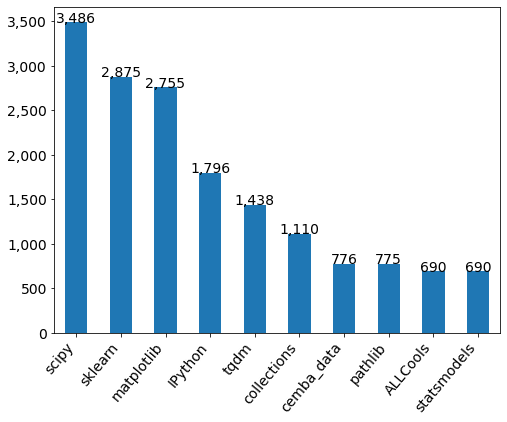

### Remove duplicates

,0
scipy,3486
sklearn,2875
matplotlib,2755
IPython,1796
tqdm,1438
collections,1110
cemba_data,776
pathlib,775
ALLCools,690
statsmodels,690


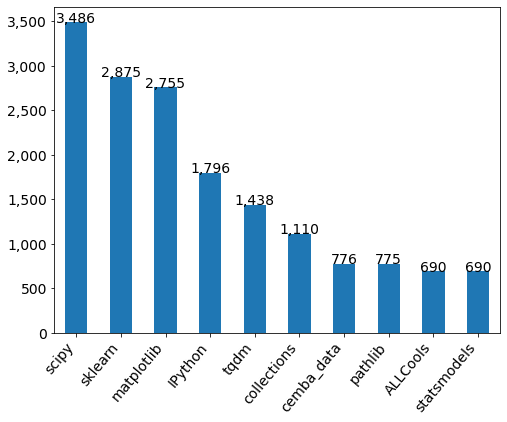

### Remove duplicates and toy

,0
scipy,3486
sklearn,2875
matplotlib,2755
IPython,1796
tqdm,1438
collections,1110
cemba_data,776
pathlib,775
ALLCools,690
statsmodels,690


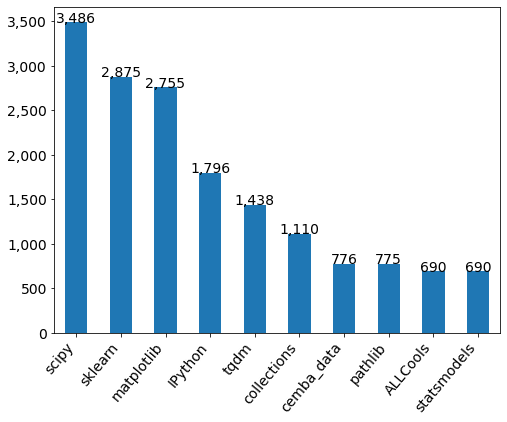

### Remove duplicates and restricted toy

,0
scipy,3486
sklearn,2875
matplotlib,2755
IPython,1796
tqdm,1438
collections,1110
cemba_data,776
pathlib,775
ALLCools,690
statsmodels,690


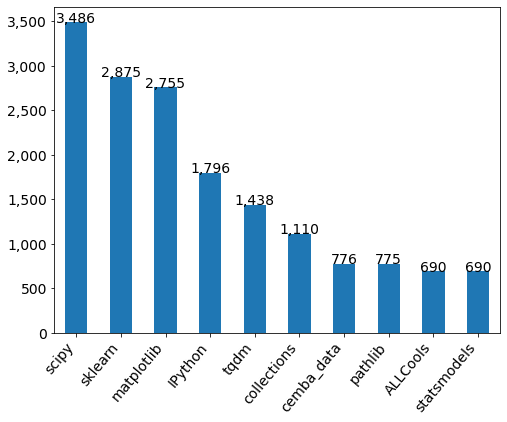

In [21]:
@calculate_auto(CONFIG)
@close_fig
def fn(modules, prefix):
    counter = Counter()
    modules["toplevel_any_import_from"].agg(lambda x: counter.update(x))
    del counter[""]
    counts = pd.Series(counter).sort_values(ascending=False)
    with savefig(prefix + "notebook_module_import_from_toplevel", 8, 6):
        fig, cnt = display_counts(
            counts,
            width=20,
            show_values=True,
            plot=False,
            cut=slice(None, 10),
            logy=False,
        )
        display(cnt)
        ax = plt.gca()
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
        ax.legend().set_visible(False)

## load_ext

### Full import

### Default

,0
autoreload,1561
rpy2.ipython,301
watermark,124
lab_black,20
memory_profiler,14
tensorboard,14
line_profiler,12
watermark,12
rpy2.ipython,10
ferretmagic,9


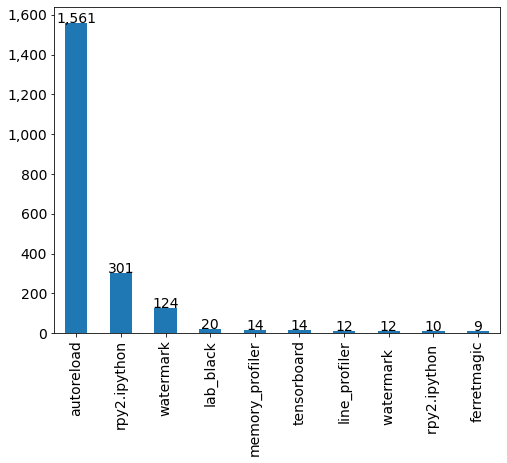

### Remove duplicates

,0
autoreload,1561
rpy2.ipython,301
watermark,124
lab_black,20
memory_profiler,14
tensorboard,14
line_profiler,12
watermark,12
rpy2.ipython,10
ferretmagic,9


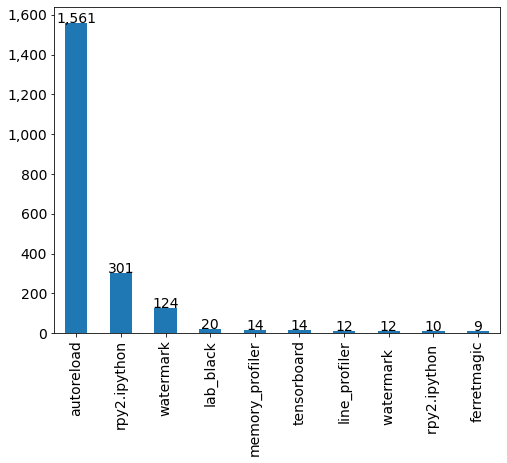

### Remove duplicates and toy

,0
autoreload,1561
rpy2.ipython,301
watermark,124
lab_black,20
memory_profiler,14
tensorboard,14
line_profiler,12
watermark,12
rpy2.ipython,10
ferretmagic,9


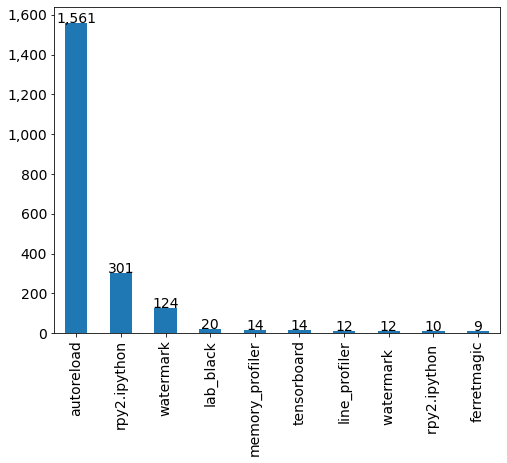

### Remove duplicates and restricted toy

,0
autoreload,1561
rpy2.ipython,301
watermark,124
lab_black,20
memory_profiler,14
tensorboard,14
line_profiler,12
watermark,12
rpy2.ipython,10
ferretmagic,9


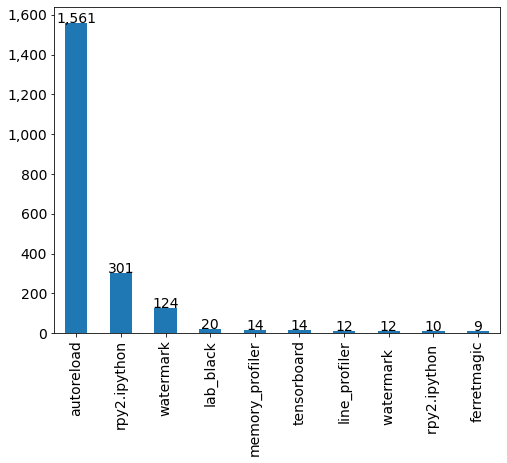

In [22]:
@calculate_auto(CONFIG)
@close_fig
def fn(modules, prefix):
    counter = Counter()
    modules["any_load_ext"].agg(lambda x: counter.update(x))
    del counter[""]
    counts = pd.Series(counter).sort_values(ascending=False)
    with savefig(prefix + "notebook_module_load_ext_full_import", 8, 6):
        fig, cnt = display_counts(
            counts,
            width=20,
            show_values=True,
            plot=False,
            cut=slice(None, 10),
            logy=False,
        )
        display(cnt)
        ax = plt.gca()
        ax.legend().set_visible(False)

### Toplevel

### Default

,0
autoreload,1561
rpy2,311
watermark,124
lab_black,20
tensorboard,15
memory_profiler,14
watermark,12
line_profiler,12
ferretmagic,9
ipython_unittest,5


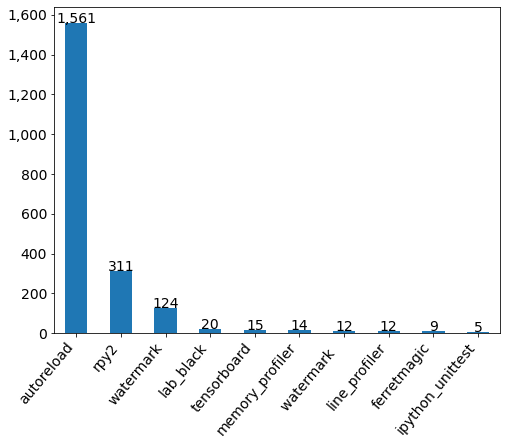

### Remove duplicates

,0
autoreload,1561
rpy2,311
watermark,124
lab_black,20
tensorboard,15
memory_profiler,14
watermark,12
line_profiler,12
ferretmagic,9
ipython_unittest,5


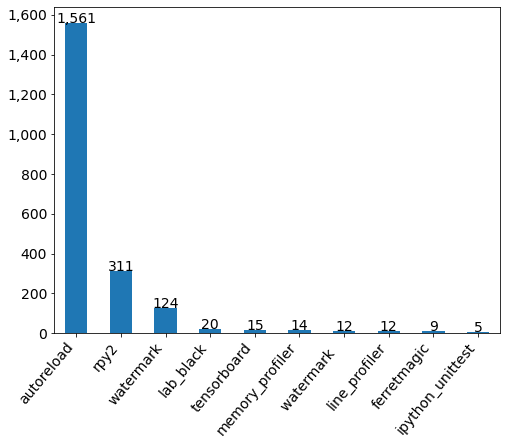

### Remove duplicates and toy

,0
autoreload,1561
rpy2,311
watermark,124
lab_black,20
tensorboard,15
memory_profiler,14
watermark,12
line_profiler,12
ferretmagic,9
ipython_unittest,5


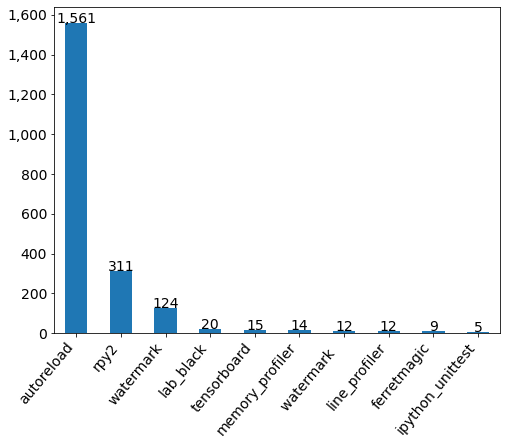

### Remove duplicates and restricted toy

,0
autoreload,1561
rpy2,311
watermark,124
lab_black,20
tensorboard,15
memory_profiler,14
watermark,12
line_profiler,12
ferretmagic,9
ipython_unittest,5


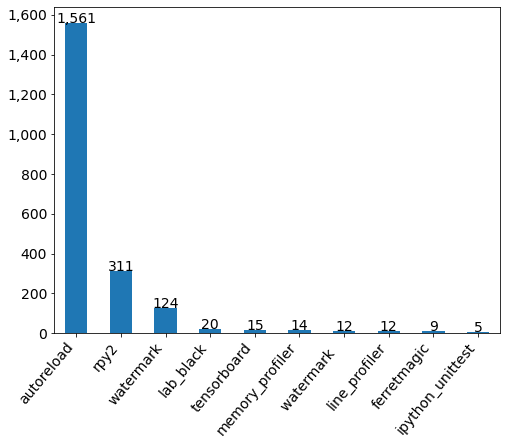

In [23]:
@calculate_auto(CONFIG)
@close_fig
def fn(modules, prefix):
    counter = Counter()
    modules["toplevel_any_load_ext"].agg(lambda x: counter.update(x))
    del counter[""]
    counts = pd.Series(counter).sort_values(ascending=False)
    with savefig(prefix + "notebook_module_load_ext_toplevel", 8, 6):
        fig, cnt = display_counts(
            counts,
            width=20,
            show_values=True,
            plot=False,
            cut=slice(None, 10),
            logy=False,
        )
        display(cnt)
        ax = plt.gca()
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
        ax.legend().set_visible(False)

# Test-related modules

### Default

,0
statsmodels.stats.multitest,507
test_functions,23
cobra.test,22
unittest,21
jwst.associations.tests.helpers,20
tigramite.independence_tests.parcorr,14
medusa.test,14
permutationTesting,12
tigramite.independence_tests.cmiknn,9
tigramite.independence_tests.gpdc,9


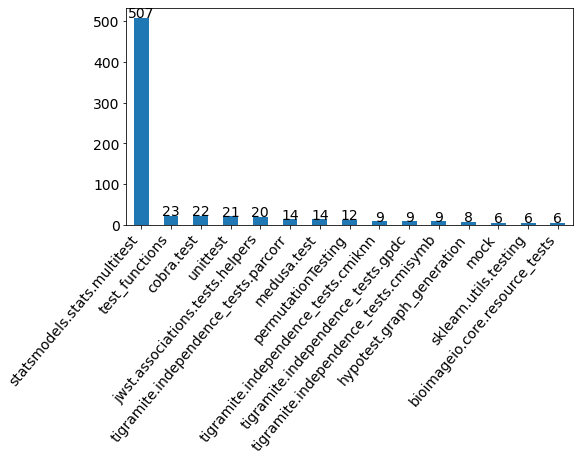

### Remove duplicates

,0
statsmodels.stats.multitest,507
test_functions,23
cobra.test,22
unittest,21
jwst.associations.tests.helpers,20
tigramite.independence_tests.parcorr,14
medusa.test,14
permutationTesting,12
tigramite.independence_tests.cmiknn,9
tigramite.independence_tests.gpdc,9


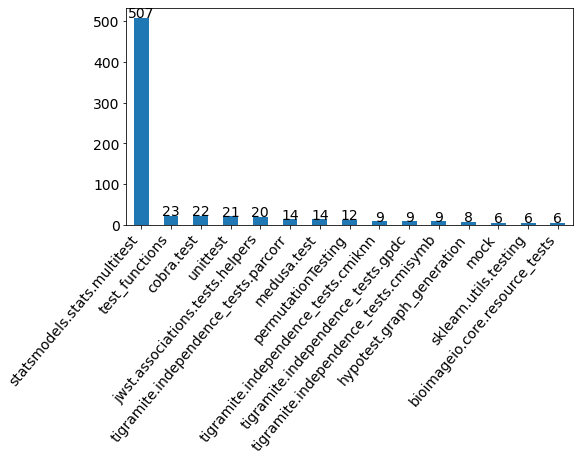

### Remove duplicates and toy

,0
statsmodels.stats.multitest,507
test_functions,23
cobra.test,22
unittest,21
jwst.associations.tests.helpers,20
tigramite.independence_tests.parcorr,14
medusa.test,14
permutationTesting,12
tigramite.independence_tests.cmiknn,9
tigramite.independence_tests.gpdc,9


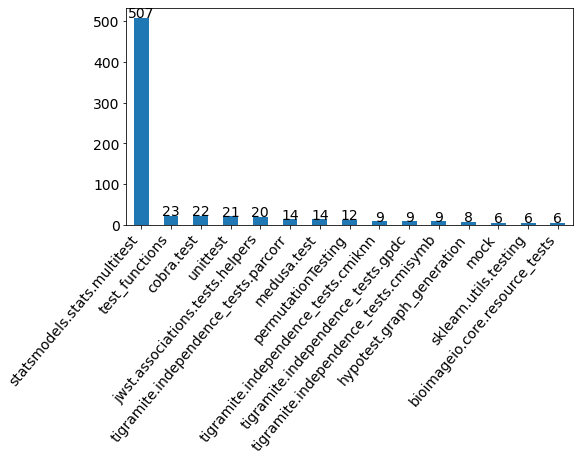

### Remove duplicates and restricted toy

,0
statsmodels.stats.multitest,507
test_functions,23
cobra.test,22
unittest,21
jwst.associations.tests.helpers,20
tigramite.independence_tests.parcorr,14
medusa.test,14
permutationTesting,12
tigramite.independence_tests.cmiknn,9
tigramite.independence_tests.gpdc,9


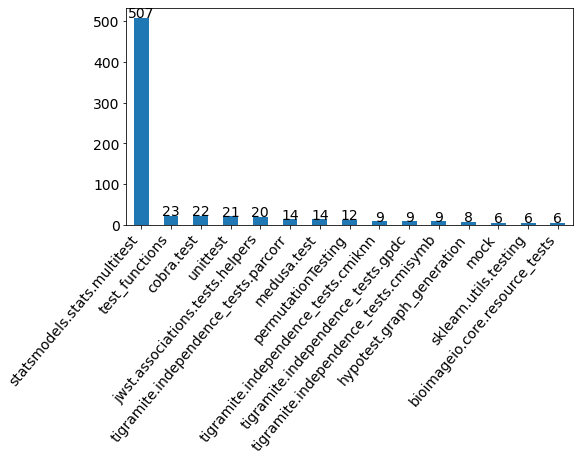

In [24]:
def check_test(y, name):
    return y == name or y.startswith(name) and y[len(name)] == "."


def is_test(y):
    """Modules related to test, mocks, and fixtures.
    Select Unittet, Mock tools, Fuzz Testing tools, Acceptance testing tools
    from https://wiki.python.org/moin/PythonTestingToolsTaxonomy

    Unit test,"""
    return (
        "test" in y
        or "TEST" in y
        or "Test" in y
        or "mock" in y
        or "MOCK" in y
        or "Mock" in y
        or "fixture" in y
        or "FIXTURE" in y
        or "Fixture" in y
        # or check_test(y, 'unittest')
        # or check_test(y, 'doctest')
        # or check_test(y, 'pytest')
        or check_test(y, "nose")
        # or check_test(y, 'testify')
        or check_test(y, "twisted.trial")
        # or check_test(y, 'testify')
        or check_test(y, "subunit")
        # or check_test(y, 'testresources')
        or check_test(y, "reahl.tofu")
        # or check_test(y, 'testtools')
        or check_test(y, "sancho")
        # or check_test(y, 'zope.testing')
        or check_test(y, "pry")
        or check_test(y, "pythoscope")
        # or check_test(y, 'testlib')
        # or check_test(y, 'pytest')
        # or check_test(y, 'utils.dutest')
        # or check_test(y, 'testoob')
        # or check_test(y, 'TimedTest') # pyUnitPerf
        # or check_test(y, 'LoadTest') # pyUnitPerf
        or check_test(y, "peckcheck")
        # or check_test(y, 'testosterone')
        # or check_test(y, 'qunittest')
        # Mock tools
        or check_test(y, "ludibrio")
        # or check_test(y, 'mock')
        # or check_test(y, 'pymock')
        # or check_test(y, 'unittest.mock')
        # or check_test(y, 'pmock')
        # or check_test(y, 'minimock')
        # or check_test(y, 'svnmock')
        # or check_test(y, 'mocker')
        or check_test(y, "reahl.stubble")
        or check_test(y, "mox")
        # or check_test(y, 'mocktest')
        or check_test(y, "fudge")
        # or check_test(y, 'mockito')
        # or check_test(y, 'capturemock')
        or check_test(y, "doublex")
        or check_test(y, "aspectlib")
        # Fuzz Testing
        or check_test(y, "hypothesis")
        or check_test(y, "pester")
        # peach - executable only
        or check_test(y, "antiparser")
        or check_test(y, "taof")
        or check_test(y, "fusil")
        # web testing tools - ignored
        # acceptance/business logic testing
        or check_test(y, "behave")
        or check_test(y, "fit")
        # texttext - executable only
        or check_test(y, "lettuce")
        # FitLoader - unavailable
        # robot framework
        # gui testing toolls - ignored
    )


@calculate_auto(CONFIG)
@close_fig
def fn(modules, prefix):
    counter = Counter()
    modules["any_any"].agg(lambda x: counter.update({y for y in x if is_test(y)}))
    del counter[""]
    counts = pd.Series(counter).sort_values(ascending=False)
    with savefig(prefix + "notebook_tests", 8, 4):
        fig, cnt = display_counts(
            counts,
            width=20,
            show_values=True,
            plot=False,
            cut=slice(None, 15),
            logy=False,
        )
        display(cnt)
        ax = plt.gca()
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
        ax.legend().set_visible(False)

In [25]:
@calculate_auto(CONFIG)
def fn(modules, total_valid_python_notebooks, prefix):
    return relative_var(
        prefix + "notebooks_with_test",
        len(modules[modules["any_any"].apply(lambda x: any(is_test(y) for y in x))]),
        total_valid_python_notebooks,
    )

### Default

776 (3.75%)


### Remove duplicates

776 (3.75%)


### Remove duplicates and toy

776 (3.75%)


### Remove duplicates and restricted toy

776 (3.75%)


In [26]:
@calculate_auto(CONFIG)
def fn(modules, total_valid_python_notebooks, prefix):
    return relative_var(
        prefix + "notebooks_with_unittest",
        len(modules[modules["any_any"].apply(lambda x: "unittest" in x)]),
        total_valid_python_notebooks,
    )

### Default

21 (0.10%)


### Remove duplicates

21 (0.10%)


### Remove duplicates and toy

21 (0.10%)


### Remove duplicates and restricted toy

21 (0.10%)
